<a href="https://colab.research.google.com/github/The-DarK-os/Neural-networks/blob/main/cnn_y_model_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, MaxPool2D, Flatten, concatenate
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(x_train.shape)
img_shape = x_train.shape[1]
x_train = np.reshape(x_train,[-1,img_shape,img_shape,1])
x_test = np.reshape(x_test,[-1,img_shape,img_shape,1])
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

(60000, 28, 28)


In [ ]:
input_shape = (img_shape,img_shape,1)
batch_size=32
kernel_size = 3
dropout = 0.4
n_filters = 32

In [ ]:
left_model_input = Input(shape=input_shape,name="left_input")
filters = n_filters 
for _ in range(3):
  left_model = (Conv2D(filters = filters,kernel_size=kernel_size,padding="same",activation="relu"))(left_model_input)
  left_model = (Dropout(dropout))(left_model)
  left_model = (MaxPool2D(pool_size=(2,2),padding="same"))(left_model)
  filters *=  2

In [ ]:
right_model_input = Input(shape=input_shape,name="right_input")
filters = n_filters
for _ in range(3):
  right_model = (Conv2D(filters = filters,kernel_size=kernel_size,padding="same",activation="relu"))(right_model_input)
  right_model = (Dropout(dropout))(right_model)
  right_model = (MaxPool2D(pool_size=(2,2),padding="same"))(right_model)
  filters *=  2

In [ ]:
right_model = concatenate([left_model,right_model])
right_model = (Flatten())(right_model)
right_model = (Dropout(dropout))(right_model)
outputs = Dense(num_labels,activation="softmax")(right_model)

In [ ]:
model = Model([left_model_input,right_model_input],outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 left_input (InputLayer)        [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 right_input (InputLayer)       [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 28, 28, 128)  1280        ['left_input[0][0]']             
                                                                                                  
 conv2d_11 (Conv2D)             (None, 28, 28, 128)  1280        ['right_input[0][0]']            
                                                                                            

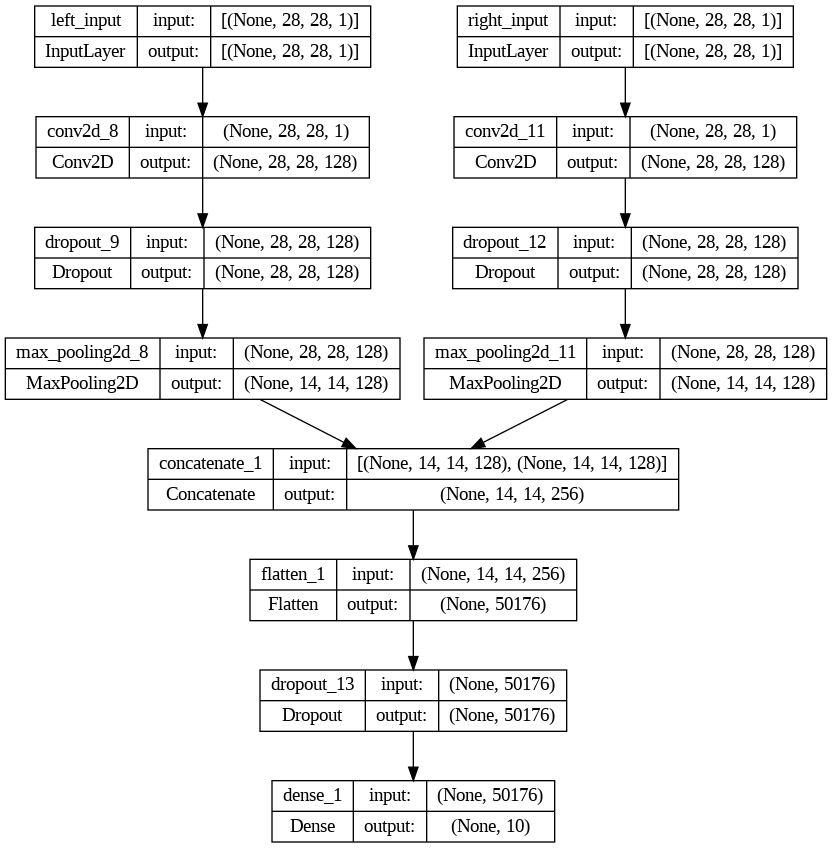

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
import sys
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor="val_accuracy",patience = 1)
checkpoint = ModelCheckpoint(filepath = "/checkpoint_model",save_weights_only = True, mode = "max",save_best_only=True,monitor="val_accuracy",verbose=1)

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
try:
  model.fit([x_train,x_train],y_train,validation_data=([x_test,x_test],y_test),epochs=20,batch_size=batch_size,callbacks=[early_stop,checkpoint])
except KeyboardInterrupt:
  print("keyboardinterrupt")

Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.1461 - accuracy: 0.9560
Epoch 1: val_accuracy improved from -inf to 0.97780, saving model to /checkpoint_model
1875/1875 [==============================] - 380s 202ms/step - loss: 0.1461 - accuracy: 0.9560 - val_loss: 0.0880 - val_accuracy: 0.9778
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0685 - accuracy: 0.9790
Epoch 2: val_accuracy improved from 0.97780 to 0.98170, saving model to /checkpoint_model
1875/1875 [==============================] - 378s 202ms/step - loss: 0.0685 - accuracy: 0.9790 - val_loss: 0.0644 - val_accuracy: 0.9817
Epoch 3/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 0.9832
Epoch 3: val_accuracy improved from 0.98170 to 0.98520, saving model to /checkpoint_model
1875/1875 [==============================] - 376s 200ms/step - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.0539 - val_accuracy: 0.9852
Epoch 4/20
1875/1875 [======

In [ ]:
  model.save("cnn-y-model.h5")

In [ ]:
score = model.evaluate([x_test,x_test],y_test,batch_size=batch_size,verbose=0)
print("Test accuracy: ",100.0*score[1])

Test accuracy:  98.089998960495


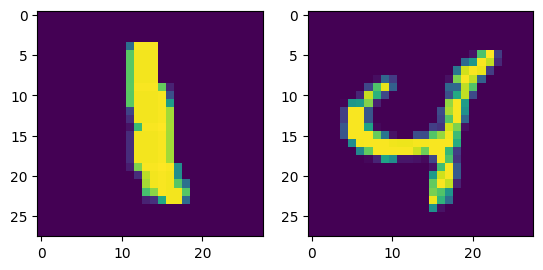

In [ ]:
import matplotlib.pyplot as plt 
ind = np.random.randint(0,100)
ind2 = np.random.randint(0,100)
fig,ax = plt.subplots(1,2)
ax[0].imshow(x_test[ind])
ax[1].imshow(x_test[ind2])

In [ ]:
np.argsort(model.predict([x_test[ind].reshape(-1,28,28,1),x_test[ind2].reshape(-1,28,28,1)]))[:][-1][-2:]

1/1 [==============================] - 0s 42ms/step


array([1, 4])

In [ ]:
def predict(num1,num2,model):
  predicted_values = model.predict([num1.reshape(-1,28,28,1),num2.reshape(-1,28,28,1)])
  sorted_values = np.argsort(predicted_values)
  pred = sorted_values[:][-1][-2:]
  return pred

1/1 [==============================] - 0s 23ms/step


Text(0.5, 1.0, '3')

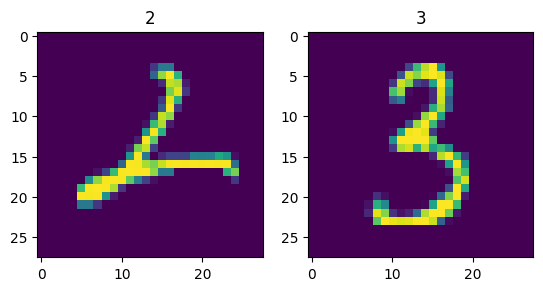

In [ ]:
ind = np.random.randint(0,100)
ind2 = np.random.randint(0,100)
fig,ax = plt.subplots(1,2)
ax[0].imshow(x_test[ind])
ax[0].set_title(predict(x_test[ind],x_test[ind2],model=model)[0])
ax[1].imshow(x_test[ind2])
ax[1].set_title(predict(x_test[ind],x_test[ind2],model=model)[1])